# Getting Graphical

This notebook introduces graphical output for text processing. It's part of the [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) and assumes that you've already worked through previous notebooks ([Getting Setup](GettingSetup.ipynb), [Getting Started](GettingStarted.ipynb),  [Getting Texts](GettingTexts.ipynb) and [Getting NLTK](GettingNltk.ipynb)). In this notebook we'll look in particular at:

* [Plotting high frequency terms](#Plotting-Word-Frequency)
* [Plotting a characteristic curve of word lengths](#The-Characteristic-Curve-of-Word-Lengths)
* [Plotting a distribution graph of terms](#Graphing-Distribution)

## Graphing in Jupyter

The Anaconda bundle already comes with the Matlablib library, so nothing further to install.

However, there's a very important step needed when graphing with iPython, you need to instruct the kernel to produce graphs inline the first time you generate a graph in a notebook. That's accomplished with this code:

> %matplotlib inline

If ever you forget to do that, your notebook might become unresponsive and you'll need to shutdown the kernel and start again. Even that's not a big deal, but best to avoid it.

We can test simple graphing in a new notebook (let's call it `GettingGraphical`) to make sure that everything is working. The syntax below also shows how we can create a shorthand name for a library so that instead of always writing ```matplotlib.pyplot``` we can simply write ```plt```.

[]

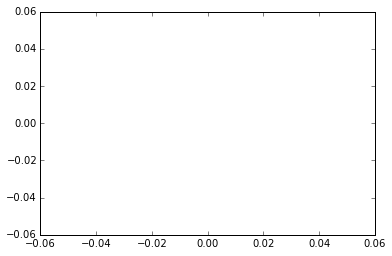

In [1]:
import matplotlib.pyplot as plt

# make sure that graphs are embedded into our notebook output
%matplotlib inline

plt.plot() # create an empty graph

Wow, who knew such insights were possible with ipython, eh? :)

## Plotting Word Frequency

The previous notebook on [Getting NLTK](GettingNltk.ipynb) explained the basics of tokenization, filtering, listing frequencies and <a href="Glossary.ipynb#Concordance" title="A list of all words within a text and their frequency of occurrence." >concordances. </a> If you need to recapitulate the essentials of the previous notebook, try running this:

```python
import urllib.request
# retrieve Poe plain text value
poeUrl = "http://www.gutenberg.org/files/2147/2147-0.txt"
poeString = urllib.request.urlopen(poeUrl).read().decode()```

And then this, in a separate <a href="Glossary.ipynb#cell" title="An input strucutre in a Notebook which runs either Markdown or Python code" >cell </a> so that we don't read repeatedly from Gutenberg:

```python
import os
# isolate The Gold Bug
start = poeString.find("THE GOLD-BUG")
end = poeString.find("FOUR BEASTS IN ONE")
goldBugString = poeString[start:end]
# save the file locally
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)
with open("data/goldBug.txt", "w") as f:
    f.write(goldBugString)```

Let's pick up where we left off by (re)reading our _Gold Bug_ text, tokenizing, filtering to keep only words, calculating frequencies and showing a table of the top frequency words. We'd previously created a filtered list that removed <a href="Glossary.ipynb#stopwords" title="A list of words which are programmed to be ignored or filtered in analysis and search queries." >stop-words </a> (very common syntactic words that don't carry much meaning), but for now we'll keep all words.

In [13]:
import nltk

# read Gold Bug plain text into string
with open("data/goldBug.txt", "r") as f:
    goldBugString = f.read()

# simple lowercase tokenize
goldBugTokensLowercase = nltk.word_tokenize(goldBugString.lower())

# filter out tokens that aren't words
goldBugWordTokensLowercase = [word for word in goldBugTokensLowercase if word[0].isalpha()]

# determine frequencies
goldBugWordTokensLowercaseFreqs = nltk.FreqDist(goldBugWordTokensLowercase)

# preview the top 20 frequencies
goldBugWordTokensLowercaseFreqs.tabulate(20)

 the   of  and    i   to    a   in   it  you  was that with   as  for  had   at   he this  but   we 
 877  465  359  336  329  327  238  213  162  137  130  114  113  113  110  108  103   99   99   98 


This table is useful for ranking the top frequency terms (from left to right), though it's difficult to get a sense from the numbers of how the frequencies compare. Do the numbers drop gradually, precipitously or irregularly? This is a perfect scenario for experimenting with visualization by producing a simple graph.

In addition to the ```tabulate()``` <a href="Glossary.ipynb#Function" title="functions provide functionality to a program" >function, </a> the frequencies (FreqDist) <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object </a> that we created as a ```plot()``` function, conveniently plots a graph of the top frequency terms. Again, in order to embed a graph in the output of an iPython Notebook we need to give the following special instruction: ```%matplotlib inline```. It's ok to repeat this several times in a notebook, but like an ```import``` statement, we really just need to do this once for the first <a href="Glossary.ipynb#cell" title="An input strucutre in a Notebook which runs either Markdown or Python code" >cell </a> in the notebook where it's relevant.

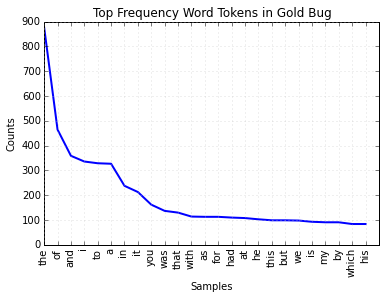

In [3]:
# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
goldBugWordTokensLowercaseFreqs.plot(25, title="Top Frequency Word Tokens in Gold Bug")

This graph shows not only the rank of the words (along the bottom x axis), but is also much more effective than the table at showing the steep decline in frequency as we move away from the first words. This is actually a well-known phenomenon with natural language and is described by Zipf's law, which the [Wikipedia article](http://en.wikipedia.org/wiki/Zipf's_law) nicely summarizes:

> Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. 

As we continue to explore frequency of words, it's useful to keep in mind the distinction between frequency rank and the actual number of words (tokens) that each word form (type) is contributing.

## The Characteristic Curve of Word Lengths

One of the first examples we have of quantitative stylistics (text analysis) is an 1887 study by T.C. Mendenhall who manually counted the length of words and used that to suggest that authors had a distinctive stylistic signature, based on the average word length of their writings. In some ways this is similar to the type/token ratio we saw in the previous notebook, as it tries to measure stylistic features of texts without considering (yet) what the words may mean. It also uses all words, even the function words that authors are maybe using less deliberately. Unlike with the type/token ratios, Mendenhall's Characteristic Curve is less sensitive to changes in the total text length. If an author uses relatively longer words, chances are that style will persist throughout a text (which is different from comparing type/token ratios for a text of 1,000 words or 100,000 words).

To calculate the frequencies of terms, we can start by replacing each word in our tokens list with the length of that word. So, instead of this:

```python
[word for word in tokens]```

we have this:

```python
[len(word) for word in tokens]```

In [4]:
goldBugLowerCaseWordTokenLengths = [len(w) for w in goldBugWordTokensLowercase]
print("first five words: ", goldBugWordTokensLowercase[:5])
print("first five word lengths: ", goldBugLowerCaseWordTokenLengths[:5])

first five words:  ['the', 'gold-bug', 'what', 'ho', 'what']
first five word lengths:  [3, 8, 4, 2, 4]


That looks right, "the" is 3 letters, "gold-bug" is 8, etc.

Now, just as we counted the frequencies of repeating words, we can count the frequencies of repeating word lengths.

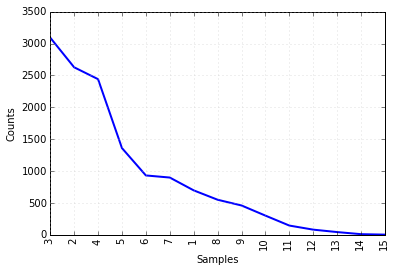

In [5]:
nltk.FreqDist(goldBugLowerCaseWordTokenLengths).plot()

That was easy, but not really what we want, since the word lengths on the bottom axis are ordered by frequency (3 is the most common word length, followed by 2, and then 4). The default behaviour of ordering by frequency was useful for words, but not as useful here if we want to order by word length.

To accomplish what we want, we'll extract items from the frequency list, which provides a sorting by key (by word length), and then create a list from that.



In [6]:
goldBugLowerCaseWordTokenLengthFreqs = list(sorted(nltk.FreqDist(goldBugLowerCaseWordTokenLengths).items()))
goldBugLowerCaseWordTokenLengthFreqs # sorted by word length (not frequency)

[(1, 697),
 (2, 2627),
 (3, 3092),
 (4, 2441),
 (5, 1360),
 (6, 931),
 (7, 898),
 (8, 550),
 (9, 460),
 (10, 301),
 (11, 145),
 (12, 81),
 (13, 43),
 (14, 10),
 (15, 3)]

Formally, this is a list of <a href="Glossary.ipynb#Tuple" title="A sequence of immutable (fixed) objects" >tuples </a> where each line represents an item in the list and within each line item there's a fixed-order <a href="Glossary.ipynb#Tuple" title="A sequence of immutable (fixed) objects" >tuple </a>  of two numbers, the first for the word length and the second for the frequency. Since lists don't have a built-in ```plot()``` <a href="Glossary.ipynb#Function" title="functions provide functionality to a program" >function </a> – unlike FreqDist that we used previously to plot high frequency words – we need to call the graphing library directly and plot the x (word lengths) and y (frequencies).

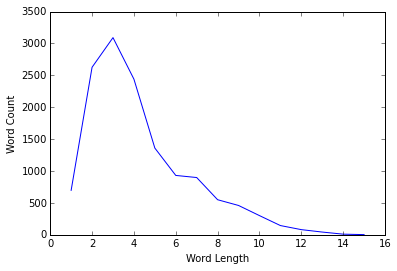

In [7]:
import matplotlib.pyplot as plt

goldBugLowerCaseWordTokenWordLengths = [f[0] for f in goldBugLowerCaseWordTokenLengthFreqs]
goldBugLowerCaseWordTokenWordLengthValues = [f[1] for f in goldBugLowerCaseWordTokenLengthFreqs]
plt.plot(goldBugLowerCaseWordTokenWordLengths, goldBugLowerCaseWordTokenWordLengthValues)
plt.xlabel('Word Length')
plt.ylabel('Word Count')

That's pretty darn close to what some of Mendenhall's graphs looked like, such as this one for the first thousand words of _Oliver Twist_:

![Characteristic Curve](images/characteristic-curve-mendenhall.png)

Thank goodness we didn't need to count tens of thousands of tokens by hand (an error-prone process) like Mendenhall did!

On its own, one characteristic curve isn't terribly useful since the point is to compare an author's curve with another, but for now at least we know we can fairly easily generate the output for one text. For now, let's shift back to working with words.

## Graphing Distribution

As we saw in the previous notebooks, sometimes it's useful to work with all word tokens (like when measuring Zipf's Law or aggregate word length) but typically we need to strip out function words to start studying the meaning of texts. Let's recapitulate the filtering steps.

In [8]:
stopwords = nltk.corpus.stopwords.words("English")
goldBugContentWordTokensLowercase = [word for word in goldBugWordTokensLowercase if word not in stopwords]
goldBugContentWordTokensLowercaseFreqs = nltk.FreqDist(goldBugContentWordTokensLowercase)
goldBugContentWordTokensLowercaseFreqs.most_common(20)

[('upon', 81),
 ('de', 73),
 ("'s", 56),
 ('jupiter', 53),
 ('legrand', 47),
 ('one', 38),
 ('said', 35),
 ('well', 35),
 ('massa', 34),
 ('could', 33),
 ('bug', 32),
 ('skull', 29),
 ('parchment', 27),
 ('made', 25),
 ('tree', 25),
 ('time', 24),
 ('first', 24),
 ('much', 23),
 ('us', 23),
 ('two', 23)]

Ok, now that we've done some plotting, we could graph the top frequency content terms, though it may be harder to read the words.

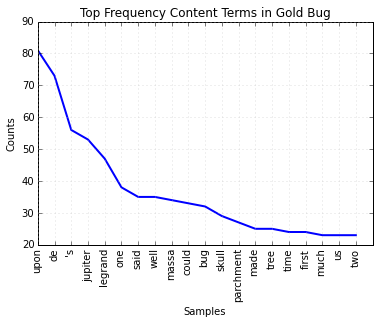

In [9]:
goldBugContentWordTokensLowercaseFreqs.plot(20, title="Top Frequency Content Terms in Gold Bug")

As we'd noticed in the last notebook, the words "jupiter" and "legrand" are suspiciously high frequency (for relatively uncommon words), which may suggest that they're being used as character names in the story. We can regenerate our NLTK text <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object </a> and ask for <a href="Glossary.ipynb#Concordance" title="A list of all words within a text and their frequency of occurrence." >concordances </a> of each to confirm this hypothesis. To help differentiate between upper and lowercase words, we'll re-tokenize the text and not perform any case alternation or filtering.

In [10]:
goldBugText = nltk.Text(nltk.word_tokenize(goldBugString))
goldBugText.concordance("jupiter", lines=5)
goldBugText.concordance("legrand", lines=5)

Displaying 5 of 53 matches:
ccompanied by an old negro , called Jupiter , who had been manumitted before th
rived to instil this obstinacy into Jupiter , with a view to the supervision an
nd gave me a most cordial welcome . Jupiter , grinning from ear to ear , bustle
 had hunted down and secured , with Jupiter 's assistance , a scarabæus which h
tellin on you , '' here interrupted Jupiter ; `` de bug is a goole bug , solid 
Displaying 5 of 47 matches:
cted an intimacy with a Mr. William Legrand . He was of an ancient Huguenot fam
 or more remote end of the island , Legrand had built himself a small hut , whi
ot improbable that the relatives of Legrand , conceiving him to be somewhat uns
repare some marsh-hens for supper . Legrand was in one of his fits -- how else 
 only known you were here ! '' said Legrand , `` but it 's so long since I saw 


Are these two character names present throughout the story? One way to get a quick sense is to create a <a href="Glossary.ipynb#dispersionplot" title="A graph which uses cartesian coordinates to display values for multiple variables of a set of data." >dispersion plot </a> which is essentially a distribution graph of occurrences. Note that [dispersion_plot()](http://www.nltk.org/api/nltk.html?highlight=dispersion_plot#nltk.text.Text.dispersion_plot) takes a list of words as an <a href="Glossary.ipynb#argument" title="A value which is passed to a function when called" > argument, </a> but that the words are case-sensitive (unlike the ```concordance()``` function). Since case matters, for other purposes it might have been preferable to use the lowercase tokens instead.

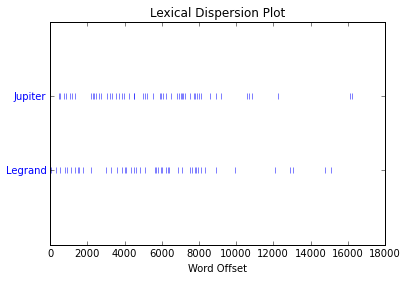

In [11]:
goldBugText.dispersion_plot(["Jupiter", "Legrand"])

This graph suggests that there are many more occurrences of the character names in the first half of the text. This doesn't necessarily mean that the characters are not as present in the second half, but their names appear less often (perhaps because of a shift in dialogue structure or narrative focus).

## Next Steps

Here are some tasks to try:

* Generate a simple list of the top 20 frequency lowercase content terms (without counts, just the terms)
* Create a <a href="Glossary.ipynb#dispersionplot" title="A graph which uses cartesian coordinates to display values for multiple variables of a set of data." >dispersion plot </a> of these terms, do any other stand out as irregularly distributed?
* Try the command [goldBugText.collocations()](http://www.nltk.org/api/nltk.html?highlight=text#nltk.text.Text.collocations) – what does this do? how might it be useful?

In the next notebook we're going to look at more powerful ways of matching terms and [Searching Meaning](SearchingMeaning.ipynb).

---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com). Edited and revised by [Melissa Mony](http://melissamony.com). <br >Created January 27, 2015 and last modified December 9, 2015 (Jupyter 4)